## Name: Bùi Phương Thảo
## ID: 11215341
### Class : DSEB 63

### 1 Problem 1
Fit model Parabola Linear Regression cho tập dữ liệu data_square.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\KyThuat88\Downloads\data_square.csv")
df.head()

,Diện tích,Giá nhà
0,30.0000,-100.000
1,32.4138,-190.725
2,34.8276,-269.798
3,37.2414,-337.218
4,39.6552,-392.985


In [4]:
#model Parabola Linear Regression is required to be used, thus add another column which stores the square value of x
df.columns = ['area', 'price']
df['area_square'] = df['area'] ** 2
df.head()

,area,price,area_square
0,30.0000,-100.000,900.000000
1,32.4138,-190.725,1050.654430
2,34.8276,-269.798,1212.961722
3,37.2414,-337.218,1386.921874
4,39.6552,-392.985,1572.534887


In [5]:
x = np.array(df[['area']])
y = np.array(df['price'])

In [6]:
class LinearRegression:
    def __init__(self):
        self.w = None
    
    def fit(self, x, y):
        x_1 = np.hstack((np.ones((x.shape[0],1)),x))
        self.w = np.dot(np.linalg.inv(np.dot(x_1.T,x_1)),np.dot((x_1.T),y))
        return self.w
    
    def predict(self,x):
        return self.w[0] + np.dot(x,self.w[1:])

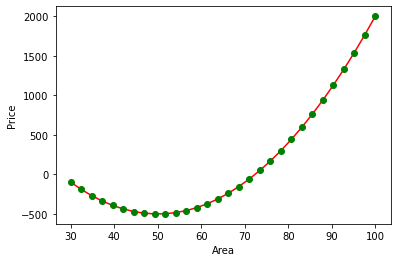

In [7]:
x_2 = np.array(df[['area','area_square']])
case1 = LinearRegression()
weight = case1.fit(x_2,y)
x_line = x
y_line = [weight[0] + weight[1]*xi + weight[2]*(xi ** 2) for xi in x_line]
plt.plot(x_line,y_line,'red')
plt.plot(x,y,'go')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [8]:
def insert_column(x,p):
    if p == 0:
        return x
    new_x = np.copy(x)
    for i in range(2, p + 1):
        new_x = np.column_stack((new_x, x ** i))
    new_x = np.c_[(np.ones((new_x.shape[0],1)),new_x)]
    return new_x

class PolyLinear:
    def __init__(self,x,y,p):
        self.x = x
        self.y = y
        self.p = p
        self.w = None

    def fit(self):
        if self.p == 0:
            return np.zeros(self.x.shape[0])
        x_c = insert_column(self.x,self.p)
        self.w = np.dot((np.linalg.inv(np.dot(x_c.T,x_c))),np.dot((x_c.T),self.y))
        return self.w
    
    def ridge(self):
        alpha = 0.0001
        if self.p == 0:
            return np.zeros(self.x.shape[0])
        x_1 = insert_column(self.x, self.p)
        iden = np.identity(x_1.shape[1])
        iden[0][0] = 0
        self.w = np.dot((np.linalg.inv(np.dot(x_1.T,x_1) + alpha * iden)),np.dot(x_1.T,self.y))
        return self.w
    
#     def update_weight(self):
#         grad = np.zeros(x_1.shape[1])
#         for j in range(x_1.shape[1]):
#             if self.w[j] > 0:
#                 grad[j] = (-2 * np.dot(self.x[:,j],(self.y - )))
        
#     def lasso(self):
#         self.iterate = 10000
#         self.learning_rate = 0.01
#         self.penalty = 0.005
        
#         self.x = insert_column(self.x, self.p)
#         self.w = np.zeros(x_1.shape[1])
#         for i in self.iterate:
#             self.update_weight()
#         return self
        
        
    def plot(self):
        plt.plot(self.x,self.y,'go')
        x_line = np.arange(np.min(self.x), np.max(self.x), 0.001)
        y_predict = self.predict(x_line)
        y_true = np.sin(2 * np.pi * x_line)
        plt.plot(x_line,y_predict, c = 'orange', label = 'Prediction')
        plt.plot(x_line, y_true, c = 'purple', label = 'Sin(2pix)')
        plt.legend()
        plt.xlabel('x')
        plt.xlabel('y')
        plt.show()
    
    def predict(self,n_x):
        if self.p == 0:
            return np.array([np.mean(self.y)] * len(n_x))
        n_x = insert_column(n_x,self.p)
        return np.dot(n_x,self.w)

## Problem 2
Tự sinh dữ liệu như hình dưới


In [9]:
def create_data(num):
    x_create = np.linspace(0,1,num)
    y_create = [np.sin(2 * np.pi * x) + np.random.normal(0,0.3,x.shape) for x in x_create]
    y_create = np.array(y_create).reshape(-1,1)
    return x_create, y_create

The W for poly 0 is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


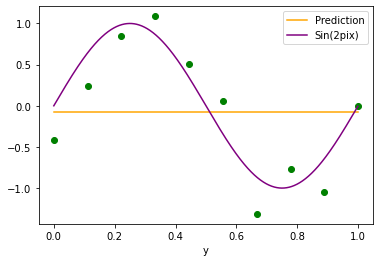

The W for poly 1 is [[ 0.49428256]
 [-1.15024907]]


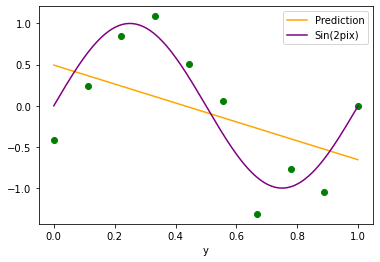

The W for poly 3 is [[ -0.6154787 ]
 [ 14.51752917]
 [-38.33459764]
 [ 24.3502967 ]]


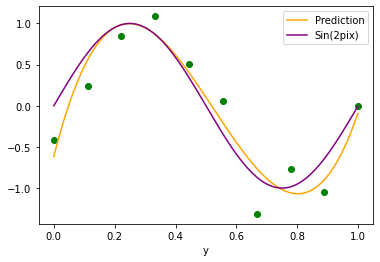

The W for poly 6 is [[-4.08557607e-01]
 [-1.22442904e-01]
 [ 8.17630087e+01]
 [-3.44814739e+02]
 [ 5.30171467e+02]
 [-3.61325110e+02]
 [ 9.47041325e+01]]


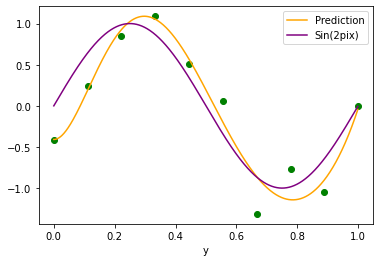

The W for poly 9 is [[-4.18731026e-01]
 [ 1.75599717e+02]
 [-4.02164826e+03]
 [ 3.73311890e+04]
 [-1.80875417e+05]
 [ 5.07592758e+05]
 [-8.55435693e+05]
 [ 8.53032361e+05]
 [-4.63282057e+05]
 [ 1.05483320e+05]]


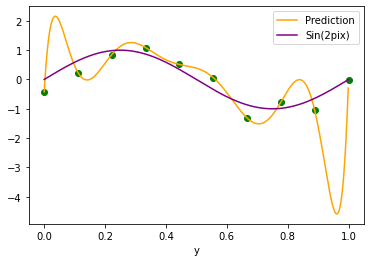

In [10]:
x_train, y_train = create_data(10)
for p in [0,1,3,6,9]:
    test = PolyLinear(x_train,y_train,p)
    w = test.fit()
    print(f'The W for poly {p} is {w}')
    test.plot()

* Đa thức bậc 0, 1: underfit
* Đa thức bậc 3 : Good fit
* Đa thức bậc 6,9 : Overfitting

### thêm 15, 100 điểm dữ liệu cho đa thức bậc 9, nhận xét mức độ overfitting

W for PRM bậc 9, 25 điểm dữ liệu là [[-5.77501304e-01]
 [ 4.00730719e+01]
 [-6.25130805e+02]
 [ 5.25260048e+03]
 [-2.41611406e+04]
 [ 6.42824572e+04]
 [-1.02144787e+05]
 [ 9.56928190e+04]
 [-4.87449103e+04]
 [ 1.04085516e+04]]


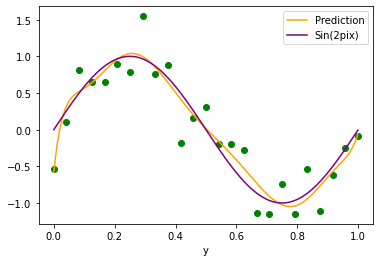

In [11]:
# thêm 15 điểm dữ liệu
a1,b1 = create_data(25)
test1 = PolyLinear(a1,b1,9)
w1 = test1.fit()
print(f'W for PRM bậc 9, 25 điểm dữ liệu là {w1}')
test1.plot()

W for PRM bậc 9, 125 điểm dữ liệu là [[-5.77501304e-01]
 [ 4.00730719e+01]
 [-6.25130805e+02]
 [ 5.25260048e+03]
 [-2.41611406e+04]
 [ 6.42824572e+04]
 [-1.02144787e+05]
 [ 9.56928190e+04]
 [-4.87449103e+04]
 [ 1.04085516e+04]]


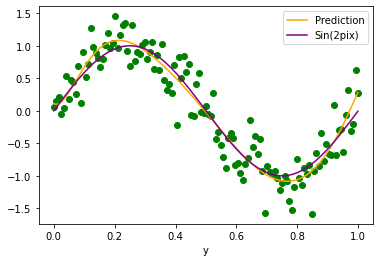

In [12]:
# thêm 100 điểm dữ liệu
a2,b2 = create_data(125)
test2 = PolyLinear(a2,b2,9)
w2 = test2.fit()
print(f'W for PRM bậc 9, 125 điểm dữ liệu là {w1}')
test2.plot()

#### Nhận xét:  Khi bổ sung thêm 100 điểm dữ liệu, vấn đề overfit được giải quyết, đường dự đoán gần như khớp hoàn toàn với đường sin 2pi x

#### c. fit đa thức bậc 9 cho 10 điểm dữ liệu ban đầu nhưng dùng Ridge để tránh overfitting. 

W của đa thức bậc 9 cho 10 điểm dữ liệu ban đầu nhưng dùng Ridge là [[ -0.47567203]
 [  9.12890232]
 [-11.54313455]
 [-11.61110279]
 [  1.20111308]
 [  8.71104922]
 [  8.63637205]
 [  4.0353573 ]
 [ -1.73662696]
 [ -6.37126233]]


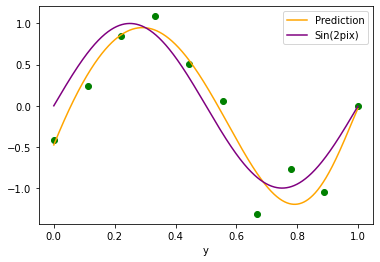

In [13]:
ridgee = PolyLinear(x_train,y_train,9)
w_ridge = ridgee.ridge()
print(f'W của đa thức bậc 9 cho 10 điểm dữ liệu ban đầu nhưng dùng Ridge là {w_ridge}')
ridgee.plot()


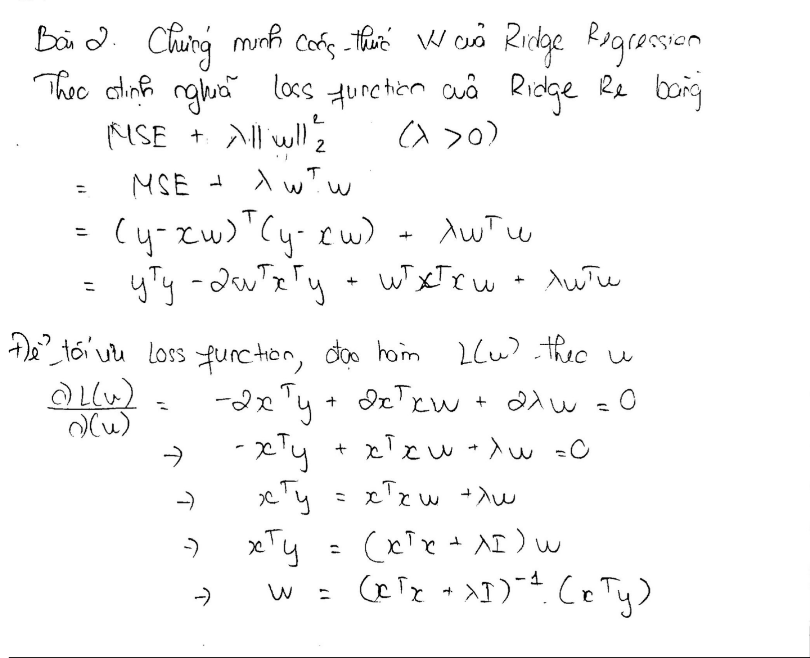

### (Optional) đọc thêm về Lasso và làm như câu (c)